In [2]:
!pip -q install lmqg
!pip -q install spacy
!python -q -m spacy download en_core_web_sm
from lmqg import TransformersQG
from pprint import pprint
import pandas as pd
import spacy
import requests
from PIL import Image
from io import BytesIO
import random

nlp = spacy.load("en_core_web_sm")

model = TransformersQG(model='lmqg/t5-base-squad-qg')

new_df = pd.read_csv('merged_df.csv')

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB 4.0 MB/s eta 0:00:04
     -- ------------------------------------- 0.8/12.8 MB 7.2 MB/s eta 0:00:02
     ---- ----------------------------------- 1.3/12.8 MB 8.5 MB/s eta 0:00:02
     ----- ---------------------------------- 1.9/12.8 MB 9.2 MB/s eta 0:00:02
     ------- -------------------------------- 2.4/12.8 MB 9.7 MB/s eta 0:00:02
     --------- ------------------------------ 2.9/12.8 MB 9.9 MB/s eta 0:00:01
     ---------- ----------------------------- 3.5/12.8 MB 10.1 MB/s eta 0:00:01
     ------------ --------------------------- 4.0/12.8 MB 10.1 MB/s eta 0:00:01
     ------------- -------------------------- 4.4/12.8 MB 10.0 MB/s eta 0:00:01
     --------------- ------------------------ 4.8/12.8 MB 9.9 MB/s eta 0:00:01
     ---------------- ----------------------- 5.3/12.8 MB 10.0 

c:\Users\yeleD\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\models\auto\tokenization_auto.py:739: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(
c:\Users\yeleD\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\models\auto\configuration_auto.py:900: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(
c:\Users\yeleD\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\modeling_utils.py:2875: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(
c:\Users\yeleD\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the o

c:\Users\yeleD\AppData\Local\Programs\Python\Python311\Lib\site-packages


In [ ]:
def phrasing(temp_df):
    shap = temp_df[temp_df['subclassification'].notna()].shape[0]
    cl = list(temp_df['classification'])[0] if shap==0 else list(temp_df['subclassification'])[0]+' '+list(temp_df['classification'])[0] 
    s = f"{list(temp_df['title'])[0]}, a {cl} by {list(temp_df['attribution'])[0]}, was developed over a period spanning from {int(list(temp_df['beginyear'])[0])} to {int(list(temp_df['endyear'])[0])}, executed in the medium of {list(temp_df['medium'])[0]}."
    return [s,random.choice([['title',list(temp_df['title'])[0]],['attribution',list(temp_df['attribution'])[0]],['medium',list(temp_df['medium'])[0]],['endyear',int(list(temp_df['endyear'])[0])],['classification',list(temp_df['classification'])[0]]])]


Welcome to Art History Quiz Game
Select the number of questions you want to answer (Max = 6)
3


Question 1


100%|██████████| 1/1 [00:00<00:00, 992.73it/s]



 What is Jug?
A:  Time-Based Media Art
B:  Index of American Design
C:  Technical Material
D:  Volume


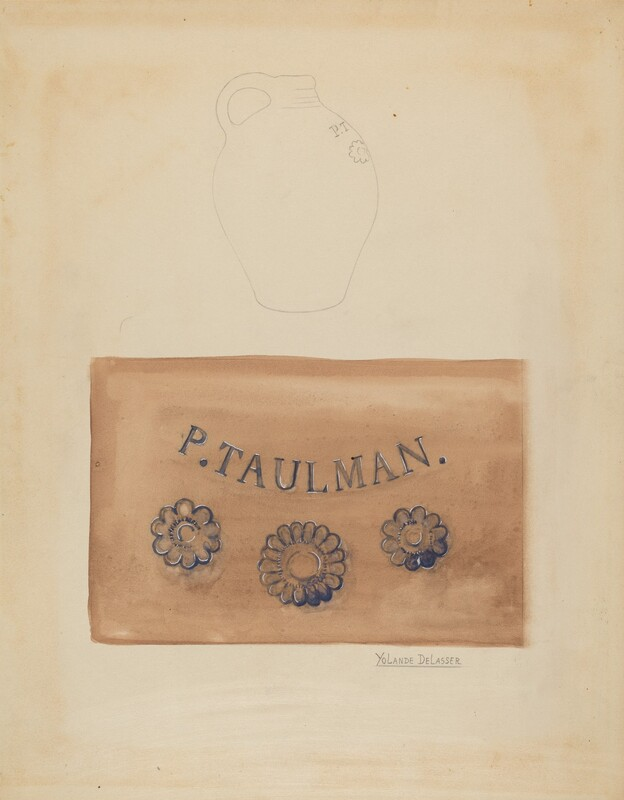

Wrong answer :( :(

Correct answer was:  Index of American Design
Current score is  0 / 1   0.0 %
Jug, a Drawing Index of American Design by Yolande Delasser, was developed over a period spanning from 1937 to 1937, executed in the medium of watercolor, graphite, and heightening on paperboard.


Question 2


100%|██████████| 1/1 [00:00<00:00, 280.35it/s]



 Who created the Christ on the Cross Print?
A:  Julian Trevelyan
B:  Linwood Easton
C:  German 15th Century
D:  Helen Louise Beccard


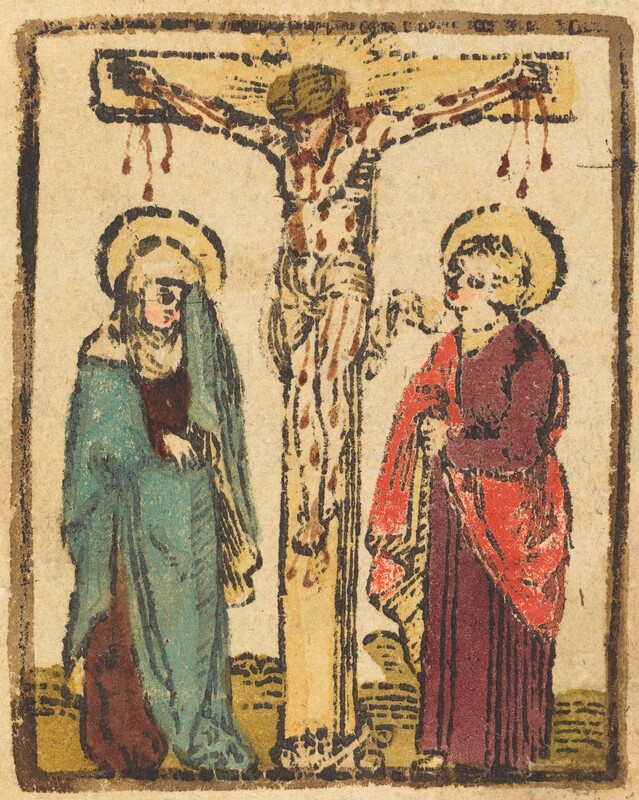

Wrong answer :( :(

Correct answer was:  German 15th Century
Current score is  0 / 2   0.0 %
Christ on the Cross, a Print by German 15th Century, was developed over a period spanning from 1490 to 1500, executed in the medium of woodcut, hand-colored in blue-green, vermilion, lavender, brown, olive, and yellow.


Question 3


100%|██████████| 1/1 [00:00<00:00, 94.29it/s]



 Who created the Drawing of Woman Turned to the Right, Standing before a Table with a Bowl of Fruit?
A:  Ben Glaha
B:  Timothy Cole after Gilbert Stuart
C:  Nicolas Guinier
D:  Mark Rothko


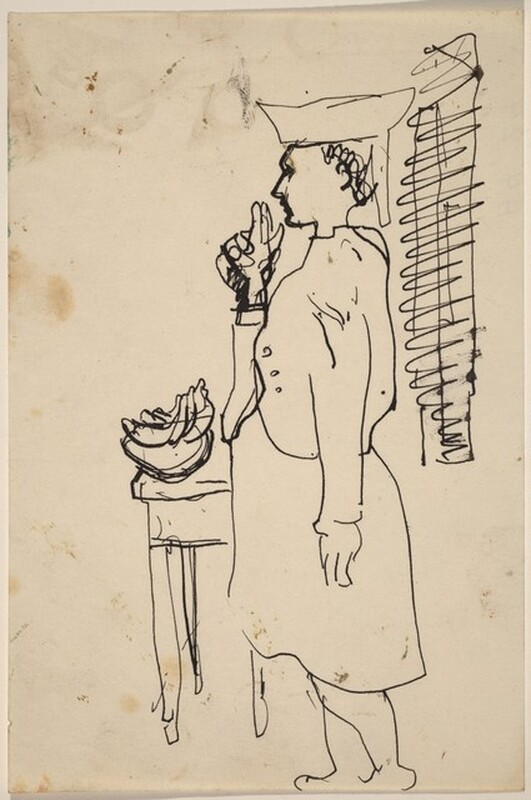

Wrong answer :( :(

Correct answer was:  Mark Rothko
Current score is  0 / 3   0.0 %
Woman Turned to the Right, Standing before a Table with a Bowl of Fruit, a Drawing by Mark Rothko, was developed over a period spanning from 1903 to 1970, executed in the medium of pen and black ink on wove paper.


In [54]:
print('''Welcome to Art History Quiz Game
Select the number of questions you want to answer (Max = 6)''')
t = int(input())
print(t)
points=0
for tt in range(min(6,t)):
    print('\n\nQuestion',tt+1)
    idd = random.choice(new_df['objectid'])
    phras = phrasing(new_df[new_df['objectid']==idd])
    context, answer = [phras[0]],[str(phras[1][1])]
    question = model.generate_q(list_context=context, list_answer=answer)
    print('\n',question[0])
    
    temp=list(new_df[new_df['objectid']==idd]['iiifthumburl'])[0]
    temp = temp[:68]+'800,800'+temp[75:]
    response = requests.get(temp)
    retImage=Image.open(BytesIO(response.content))
    uniq = random.sample(list(new_df[phras[1][0]].unique()),4)
    if phras[1][0] == 'endyear':
        uniq = [str(int(un)) for un in uniq]
    if answer not in uniq:
        uniq[3]=str(answer[0])
    uniq = random.sample(uniq,4)
    print("A: ",str(uniq[0]))
    print("B: ",str(uniq[1]))
    print("C: ",str(uniq[2]))
    print("D: ",str(uniq[3]))
    display(retImage)
    mapp = {'A':0,"B":1,"C":2,"D":3,'a':0,"b":1,"c":2,"d":3,'1':0,"2":1,"3":2,"4":3}
    ans = input('Type in your answer: ')
    if uniq[mapp[ans]] == str(answer[0]):
        points+=1
        print("Correct Answer!!\n")
        print("Current score is ",points,'/',tt+1," ",round(100*points/(tt+1),2),'%')
        print(context[0])
    else:
        print("Wrong answer :( :(\n")
        print("Correct answer was: ",answer[0])
        print("Current score is ",points,'/',tt+1," ",round(100*points/(tt+1),2),'%')
        print(context[0])
    


